In [1]:
import ROOT
from ROOT import TFile, TTree, TH1F, TCanvas, TAxis, TLegend, TTreeReader, TTreeReaderValue
import copy
ROOT.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.22/06


In [2]:
tree_dict = {}
file_temp_list = []
sample_list = ["M1-3000_R-0p3"]
for sample in sample_list:
    file = TFile.Open(f"/home/xyan13/Trijet/TrijetAna/TrijetAna/outputs/Res1ToRes2GluTo3Glu_{sample}_ML_study.root")
    file_temp = TFile(f"{sample}.root") # Well, we need this dummy declaration to make the clone work
    tree = file.Get("Events").CloneTree()
    tree_dict[sample] = tree
    file_temp_list.append(file_temp)
display(tree_dict)
for sample, tree in tree_dict.items():
    print(tree.GetEntry(0))
variable2use = [i.GetName() for i in tree.GetListOfBranches()]
display(variable2use)

{'M1-3000_R-0p3': <cppyy.gbl.TTree object at 0x56465fc032c0>}

184


['dijet_pt',
 'dijet_eta',
 'dijet_phi',
 'dijet_m',
 'dR_jj',
 'dEta_jj',
 'dPhi_jj',
 'dR_j0j2',
 'dEta_j0j2',
 'dPhi_j0j2',
 'dR_j1j2',
 'dEta_j1j2',
 'dPhi_j1j2',
 'm_jj',
 'jet_pt_0',
 'jet_eta_0',
 'jet_phi_0',
 'jet_m_0',
 'jet_ptoverm_0',
 'jet_pt_1',
 'jet_eta_1',
 'jet_phi_1',
 'jet_m_1',
 'jet_ptoverm_1',
 'jet_pt_2',
 'jet_eta_2',
 'jet_phi_2',
 'jet_m_2',
 'jet_ptoverm_2',
 'dR_jj_j',
 'dEta_jj_j',
 'dPhi_jj_j',
 'M_jjj',
 'jet_ptoverM_0',
 'jet_ptoverM_1',
 'jet_ptoverM_2',
 'dijet_ptoverM',
 'dijet_res_dPt',
 'dijet_res_dEta',
 'dijet_res_dPhi',
 'gen_dijet_matched',
 'gen_dijet_matched_mass',
 'run_num',
 'evt_num',
 'lumi_block']

Error in <TFile::TFile>: file M1-3000_R-0p3.root does not exist


In [3]:
variable2use = {}
variable2use["m_jj"] = {"title": "m_{jj} [GeV]", "binning": 100, "lb": 0, "hb": 8000}
variable2use["dijet_eta"] = {"title": "#eta_{jj}", "binning": 100, "lb": -3, "hb": 3}
variable2use["dR_jj"] = {"title": "#Delta R_{jj}", "binning": 100, "lb": 0, "hb": 6}
variable2use["dEta_jj"] = {"title": "#Delta #eta_{jj}", "binning": 100, "lb": 0, "hb": 3}
variable2use["dPhi_jj"] = {"title": "#Delta #phi_{jj}", "binning": 100, "lb": 0, "hb": 6.5}
variable2use["dR_j0j2"] = {"title": "#Delta R_{j0j2}", "binning": 100, "lb": 0, "hb": 6}
variable2use["dEta_j0j2"] = {"title": "#Delta #eta_{j0j2}", "binning": 100, "lb": 0, "hb": 3}
variable2use["dPhi_j0j2"] = {"title": "#Delta #phi_{j0j2}", "binning": 100, "lb": 0, "hb": 6.5}
variable2use["dR_j1j2"] = {"title": "#Delta R_{j1j2}", "binning": 100, "lb": 0, "hb": 6}
variable2use["dEta_j1j2"] = {"title": "#Delta #eta_{j1j2}", "binning": 100, "lb": 0, "hb": 3}
variable2use["dPhi_j1j2"] = {"title": "#Delta #phi_{j1j2}", "binning": 100, "lb": 0, "hb": 6.5}
variable2use["jet_eta_0"] = {"title": "#eta_{j0}", "binning": 100, "lb": -3, "hb": 3}
variable2use["jet_eta_1"] = {"title": "#eta_{j1}", "binning": 100, "lb": -3, "hb": 3}
variable2use["jet_eta_2"] = {"title": "#eta_{j2}", "binning": 100, "lb": -3, "hb": 3}
variable2use["jet_ptoverm_0"] = {"title": "p^{j0}_{T}/m_{jj}", "binning": 100, "lb": 0, "hb": 3}
variable2use["jet_ptoverm_1"] = {"title": "p^{j1}_{T}/m_{jj}", "binning": 100, "lb": 0, "hb": 3}
variable2use["jet_ptoverm_2"] = {"title": "p^{j2}_{T}/m_{jj}", "binning": 100, "lb": 0, "hb": 3}
variable2use["dR_jj_j"] = {"title": "#Delta R_{jj-j}", "binning": 100, "lb": 0, "hb": 6}
variable2use["dEta_jj_j"] = {"title": "#Delta #eta_{jj-j}", "binning": 100, "lb": 0, "hb": 3}
variable2use["dPhi_jj_j"] = {"title": "#Delta #phi_{jj-j}", "binning": 100, "lb": 0, "hb": 6.5}
variable2use["jet_ptoverM_0"] = {"title": "p^{j0}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 3}
variable2use["jet_ptoverM_1"] = {"title": "p^{j1}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 3}
variable2use["jet_ptoverM_2"] = {"title": "p^{j2}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 1}
variable2use["dijet_ptoverM"] = {"title": "p^{jj}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 1}
variable2use["M_jjj"] = {"title": "M_{jjj}", "binning": 100, "lb": 0, "hb": 8000}

histo_dic = {}
for variable, param_dict in variable2use.items():
    histo_dic[variable] = {}
    for sample, tree in tree_dict.items():
        histo_dic[variable][sample] = {}
        for selection in ["all","match","unmatch"]:
            histo_dic[variable][sample][selection] = TH1F(f"{sample}_{variable}_{selection}","",param_dict["binning"], param_dict["lb"], param_dict["hb"])
            histo_dic[variable][sample][selection].SetCanExtend(ROOT.TH1.kYaxis)
# display(histo_dic)

In [4]:
count = 0
for sample, tree in tree_dict.items():
    print(tree.GetEntries())
    for i, event in enumerate(tree):
        if i%10000 == 0:
            print("Processing: ",i)
#         if i > 120000: break
        for variable, hist_sample_sel_dic in histo_dic.items():
            hist_sample_sel_dic[sample]["all"].Fill(getattr(event, variable))
            if(event.gen_dijet_matched == 3):
                hist_sample_sel_dic[sample]["match"].Fill(getattr(event, variable))
                count += 1
            elif(event.gen_dijet_matched == 0):
                hist_sample_sel_dic[sample]["unmatch"].Fill(getattr(event, variable))
for variable, hist_sample_sel_dic in histo_dic.items():
    for sample, hist_sel_dic in hist_sample_sel_dic.items():
        for sel, hist in hist_sel_dic.items():
            hist.Scale(1/hist.GetEntries())

402156
Processing:  0
Processing:  10000
Processing:  20000
Processing:  30000
Processing:  40000
Processing:  50000
Processing:  60000
Processing:  70000
Processing:  80000
Processing:  90000
Processing:  100000
Processing:  110000
Processing:  120000
Processing:  130000
Processing:  140000
Processing:  150000
Processing:  160000
Processing:  170000
Processing:  180000
Processing:  190000
Processing:  200000
Processing:  210000
Processing:  220000
Processing:  230000
Processing:  240000
Processing:  250000
Processing:  260000
Processing:  270000
Processing:  280000
Processing:  290000
Processing:  300000
Processing:  310000
Processing:  320000
Processing:  330000
Processing:  340000
Processing:  350000
Processing:  360000
Processing:  370000
Processing:  380000
Processing:  390000
Processing:  400000


In [5]:
def getRangeY(hist_sel_sample_dic):
    global y_upper
    for sample, hist_sel_dic in hist_sel_sample_dic.items():
        for name, hist in hist_sel_dic.items():
            entries = [hist.GetBinContent(i) for i in range(1,hist.GetNbinsX())]
            max_entry = max(entries)
            if max_entry > y_upper:
                y_upper = max_entry * 1.1
def plot(h_plot, canvas, leg, lcolor, lstyle, xtitle, dopt, hlabel):
    global y_upper
    h_plot.SetLineWidth(2)
    h_plot.SetLineColor(lcolor)
    h_plot.SetLineStyle(lstyle)
    h_plot.Draw(dopt)
    h_plot.GetXaxis().SetTitle(xtitle)
    h_plot.GetXaxis().SetTitleOffset(1.2)
    h_plot.GetYaxis().SetTitle("Events")
    h_plot.GetYaxis().SetRangeUser(0,y_upper)
    leg.AddEntry(h_plot,hlabel)

Info in <TCanvas::Print>: png file m_jj.png has been created
Info in <TCanvas::Print>: png file dijet_eta.png has been created
Info in <TCanvas::Print>: png file dR_jj.png has been created
Info in <TCanvas::Print>: png file dEta_jj.png has been created
Info in <TCanvas::Print>: png file dPhi_jj.png has been created
Info in <TCanvas::Print>: png file dR_j0j2.png has been created
Info in <TCanvas::Print>: png file dEta_j0j2.png has been created
Info in <TCanvas::Print>: png file dPhi_j0j2.png has been created
Info in <TCanvas::Print>: png file dR_j1j2.png has been created
Info in <TCanvas::Print>: png file dEta_j1j2.png has been created
Info in <TCanvas::Print>: png file dPhi_j1j2.png has been created
Info in <TCanvas::Print>: png file jet_eta_0.png has been created
Info in <TCanvas::Print>: png file jet_eta_1.png has been created
Info in <TCanvas::Print>: png file jet_eta_2.png has been created
Info in <TCanvas::Print>: png file jet_ptoverm_0.png has been created
Info in <TCanvas::Print

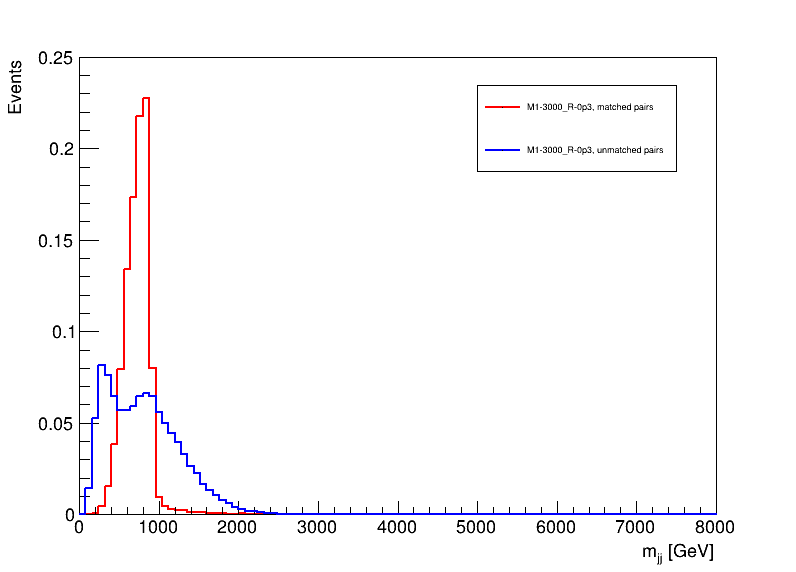

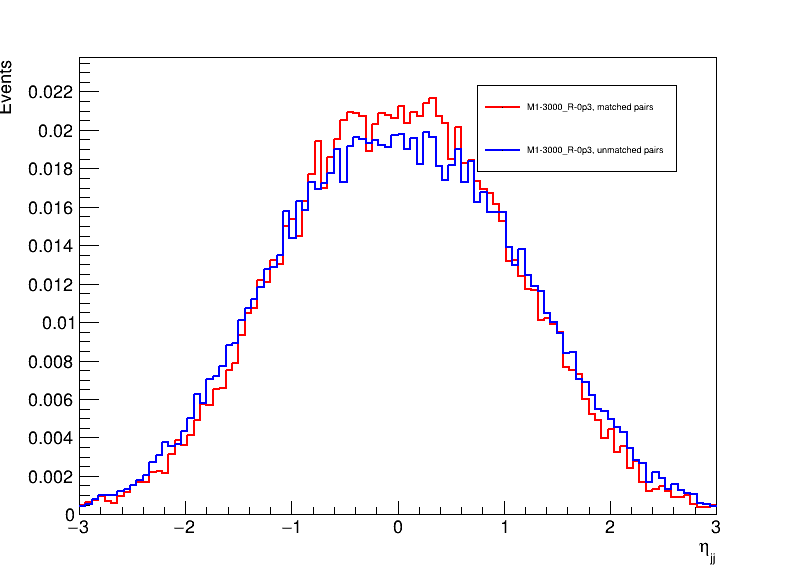

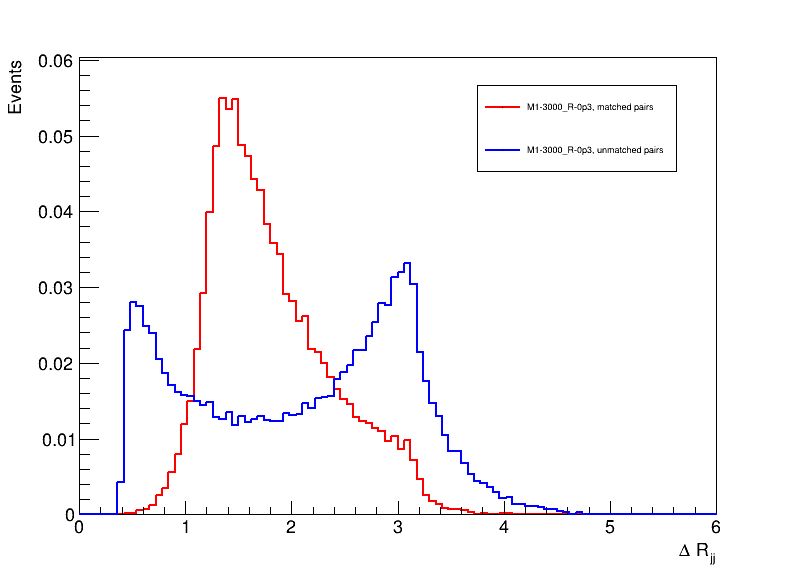

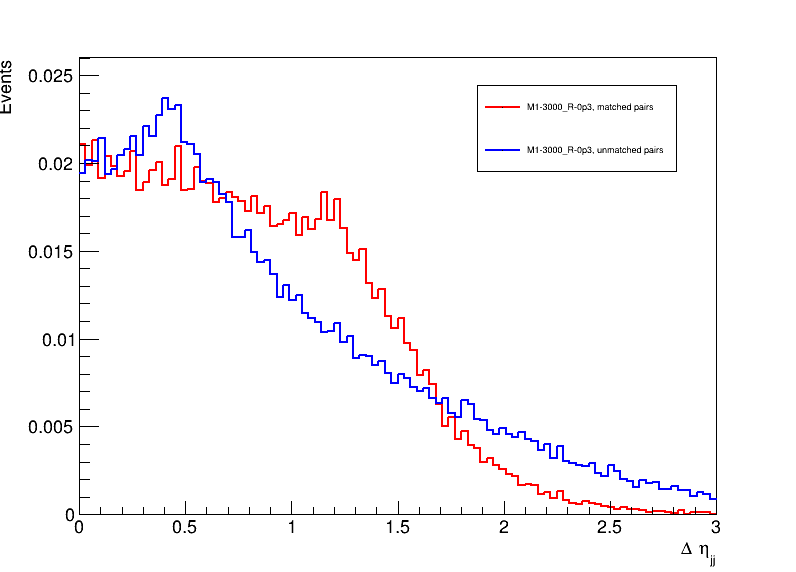

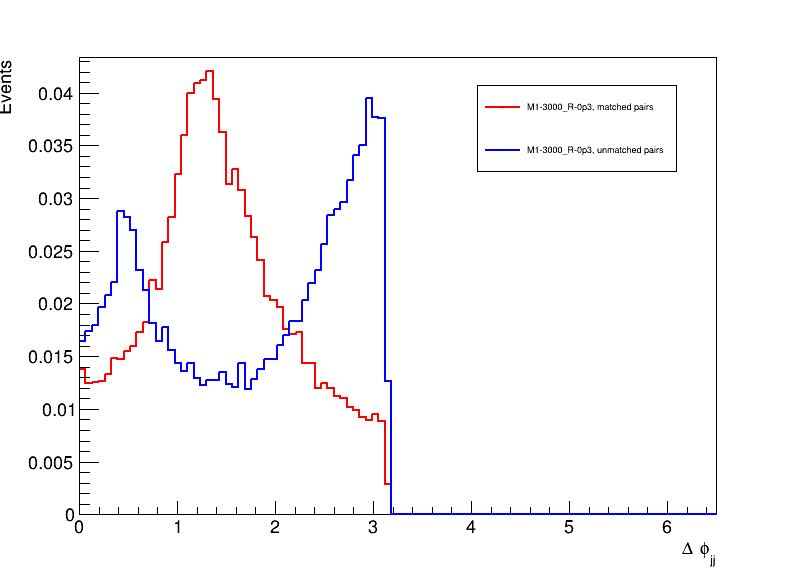

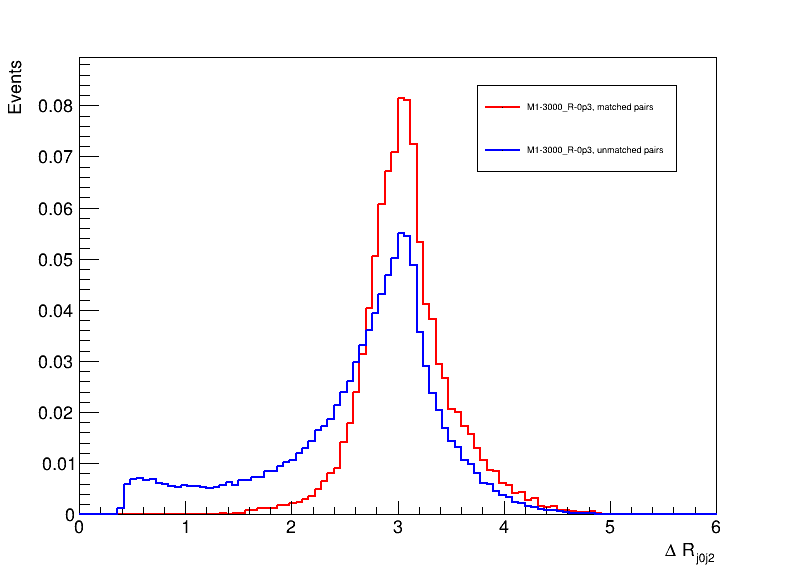

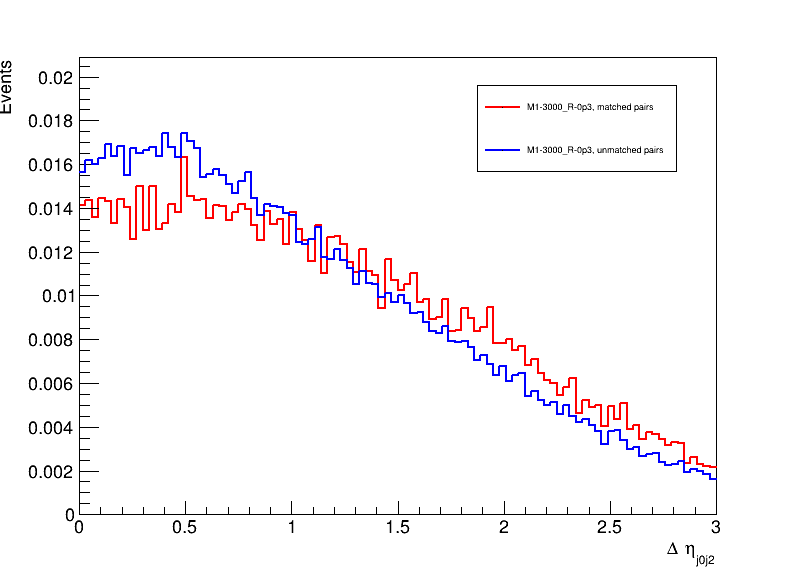

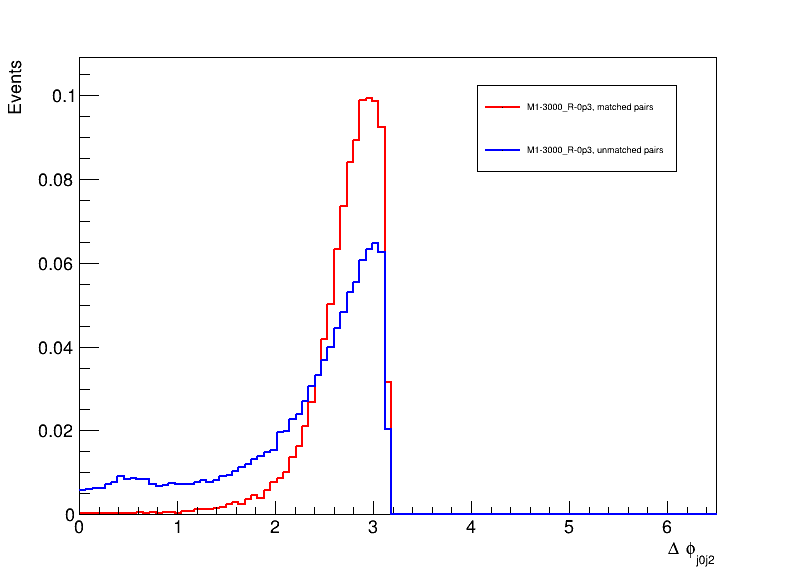

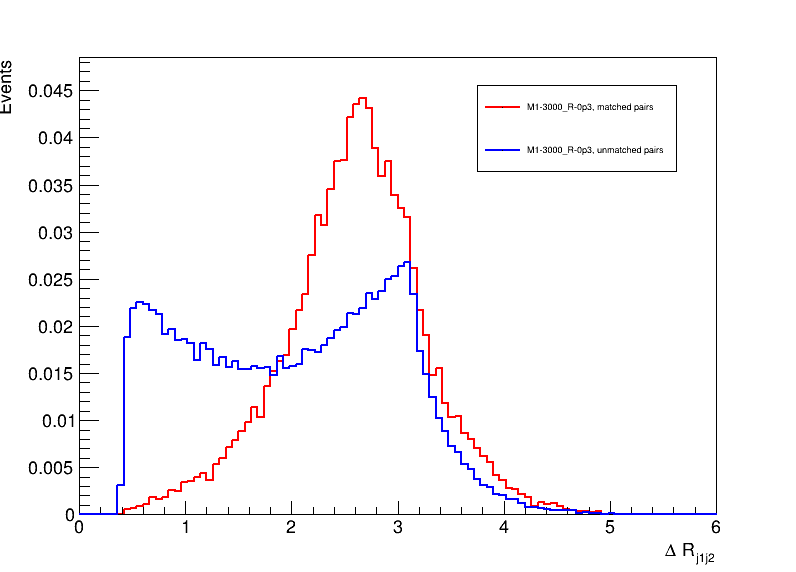

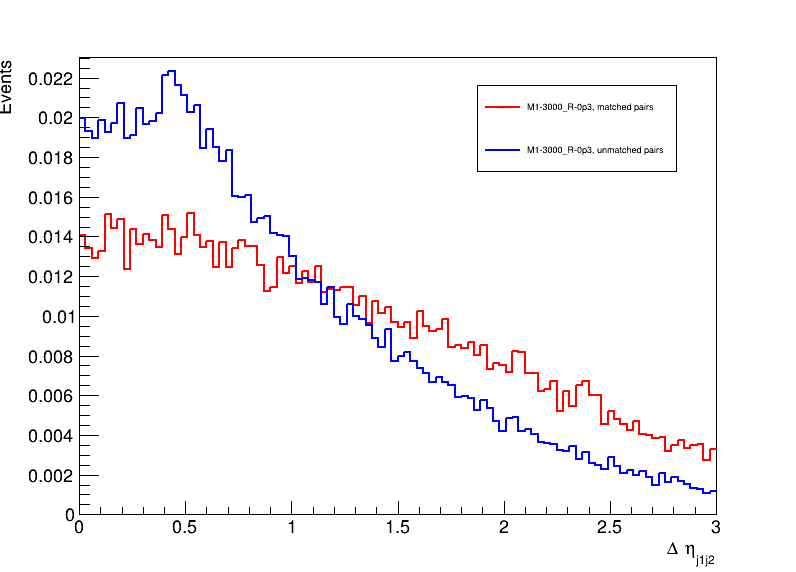

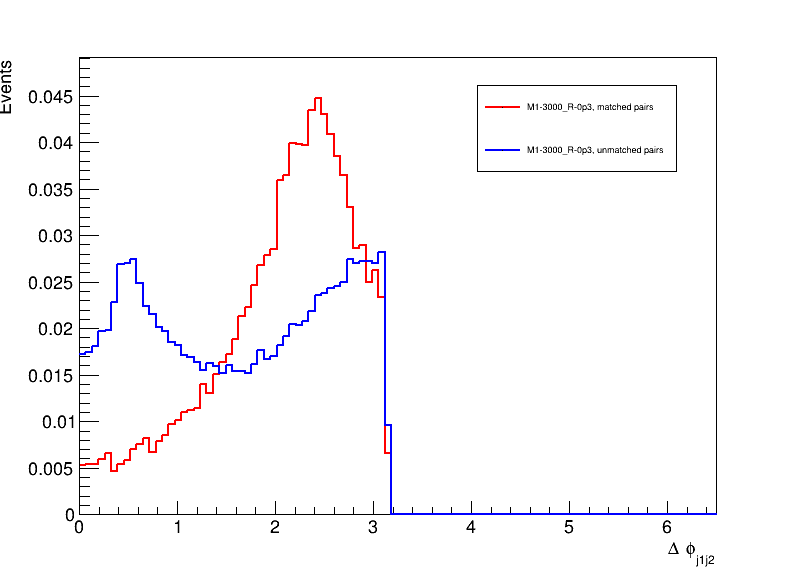

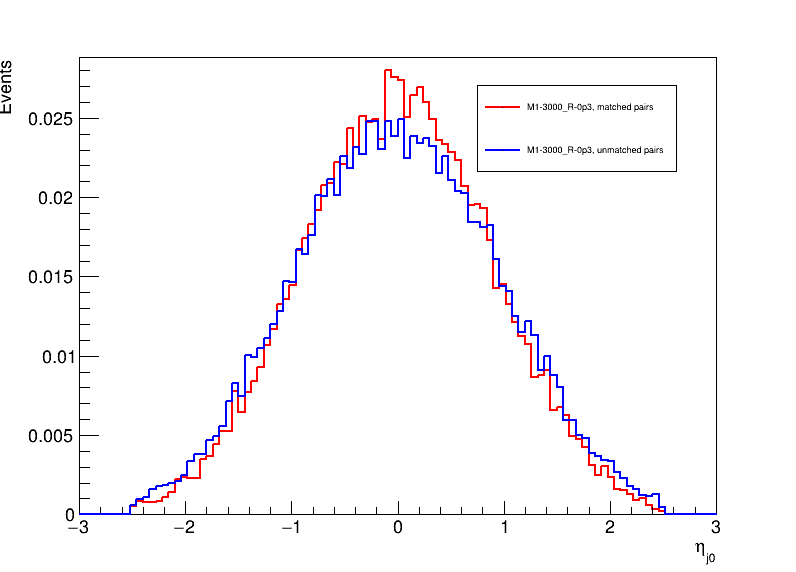

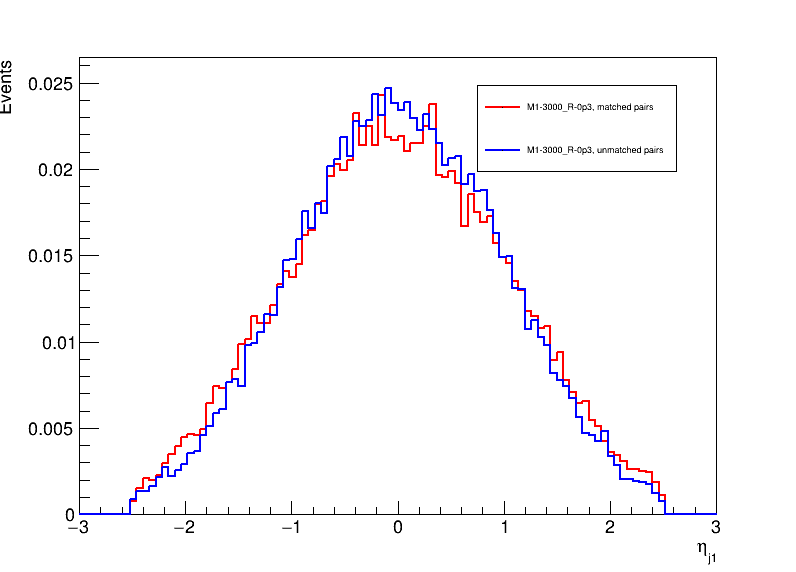

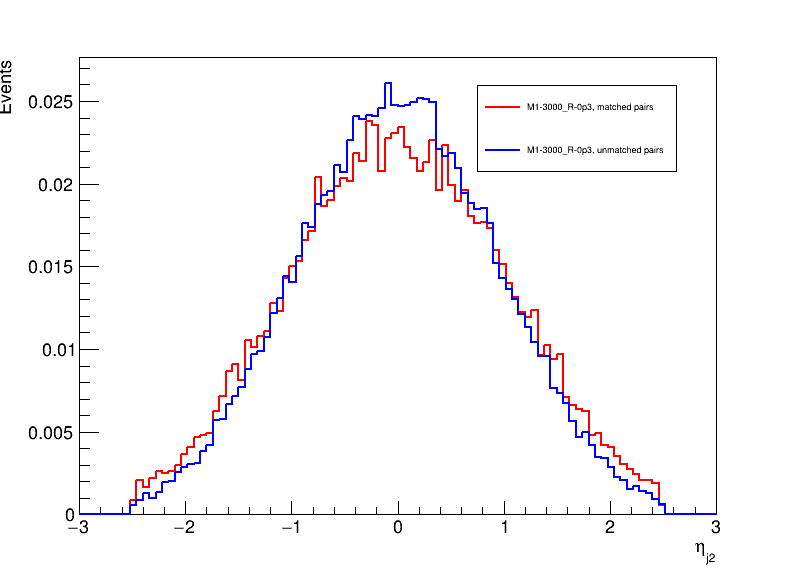

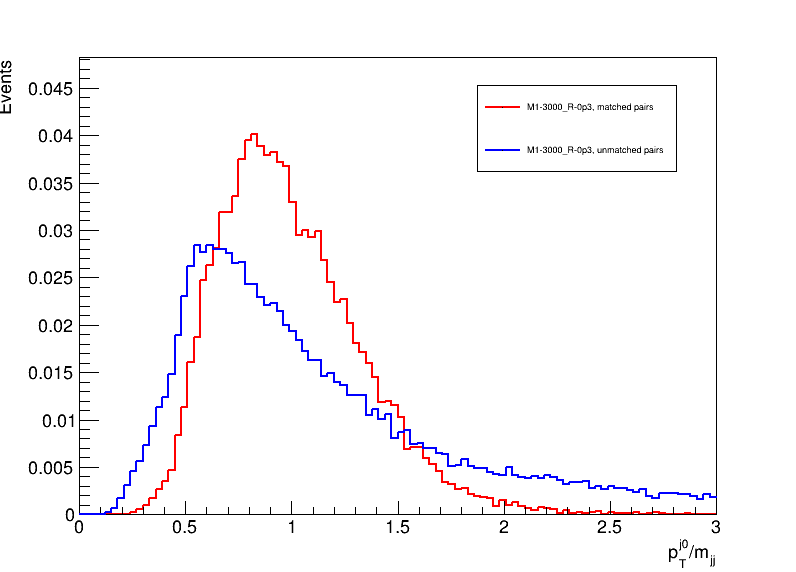

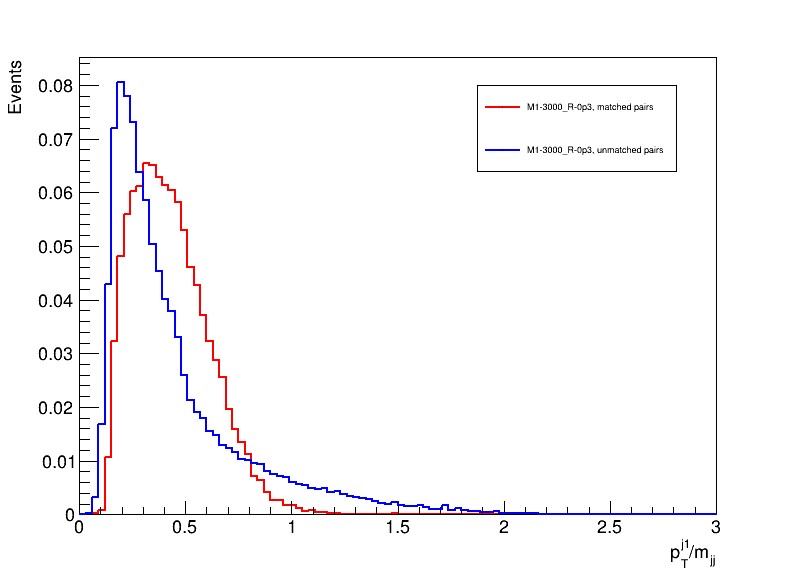

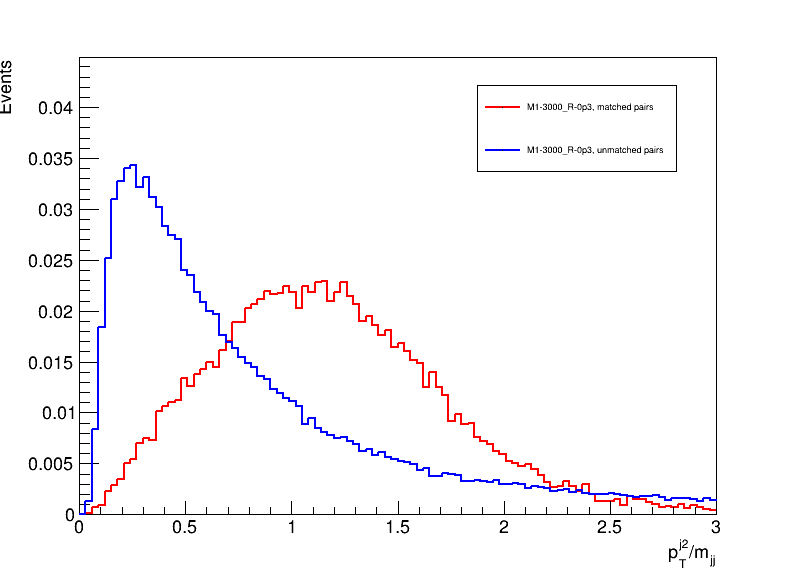

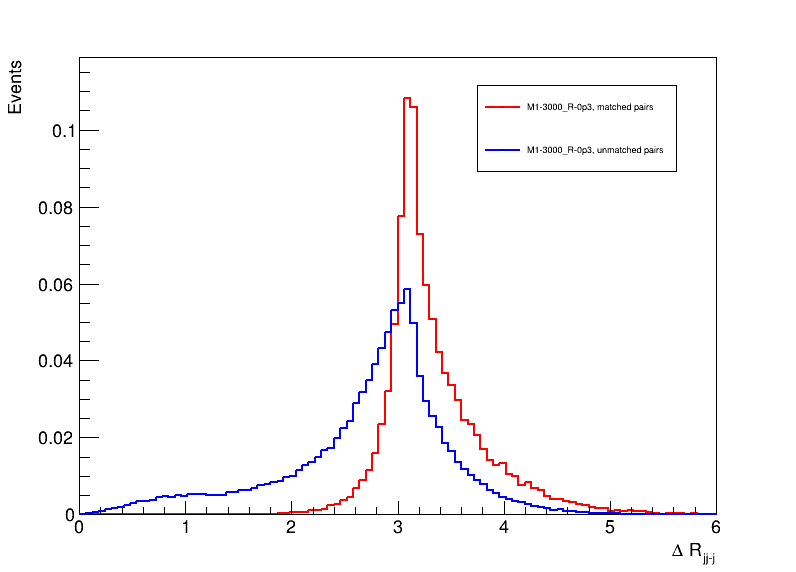

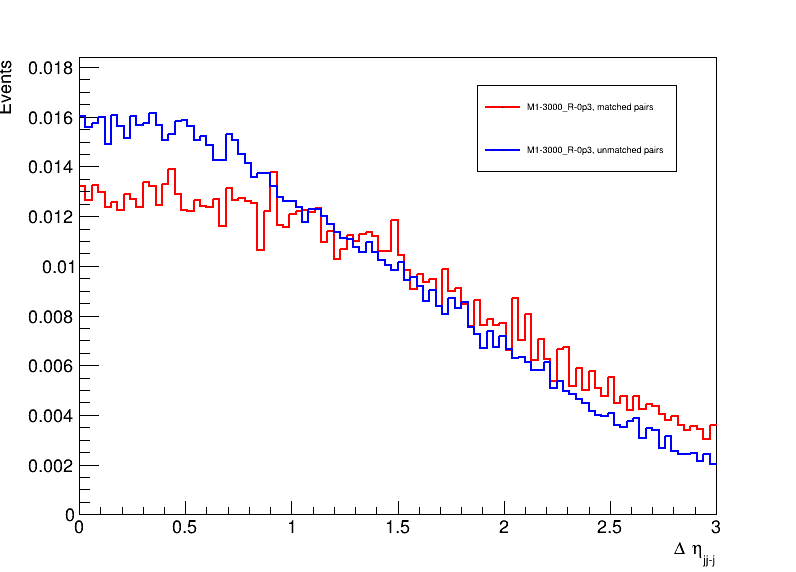

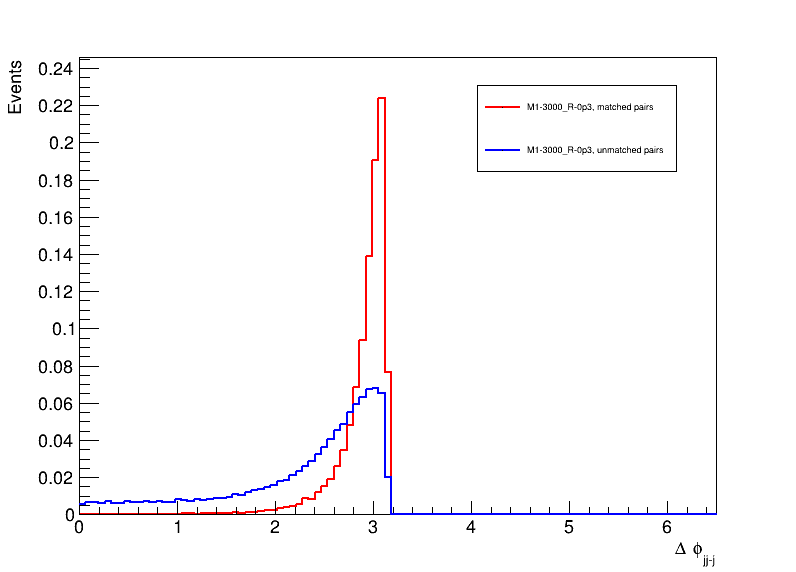

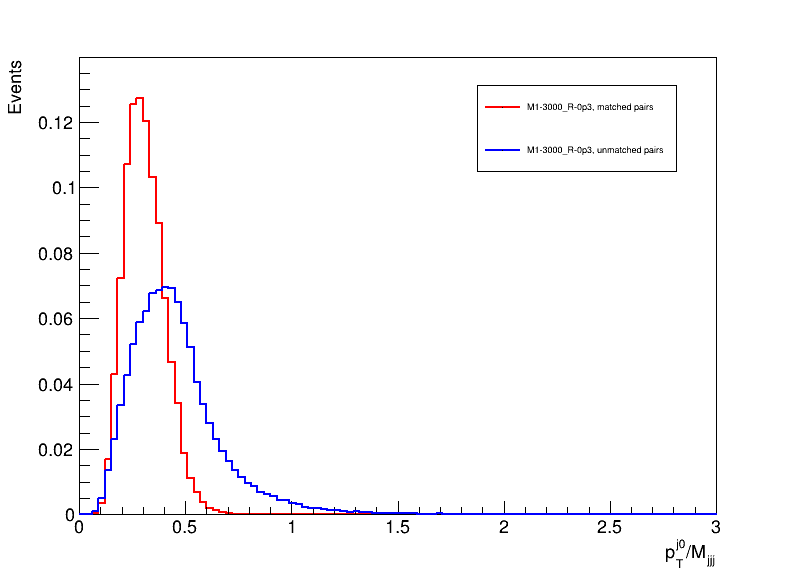

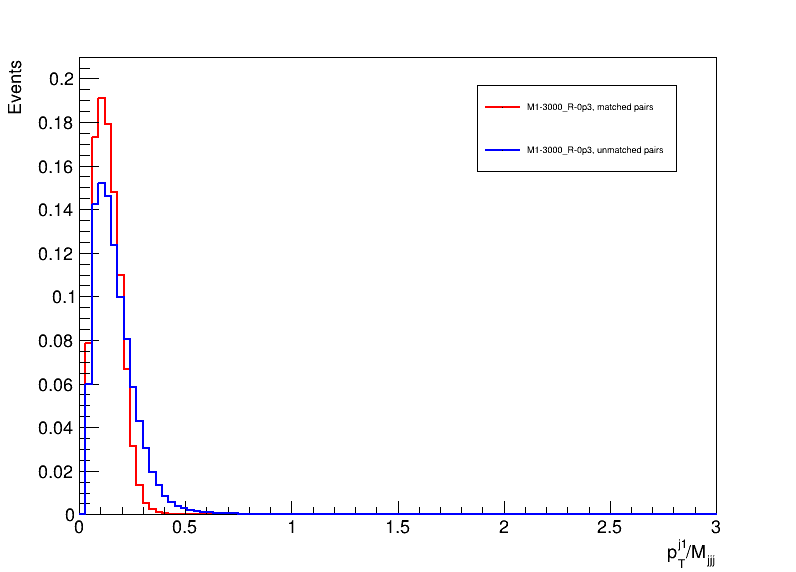

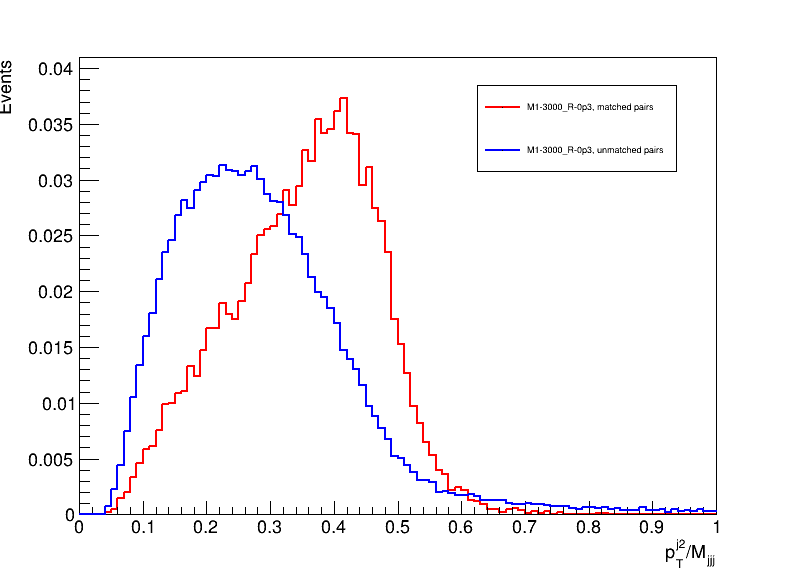

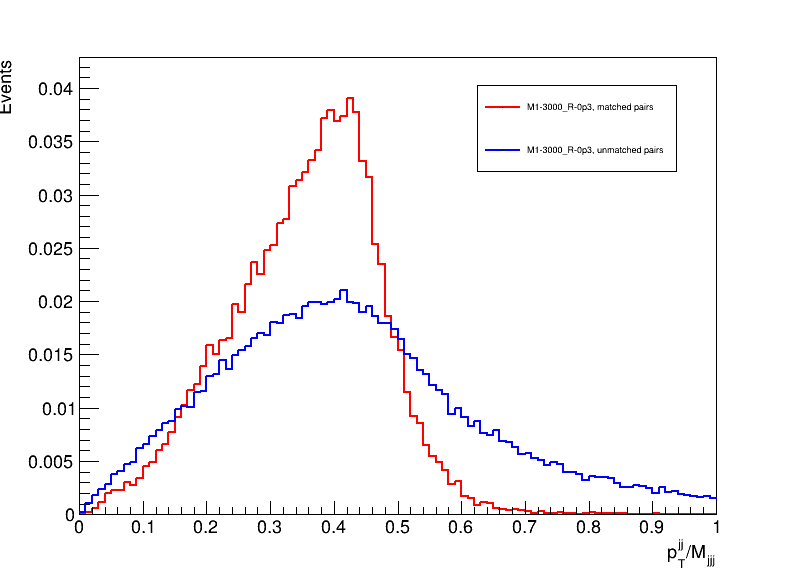

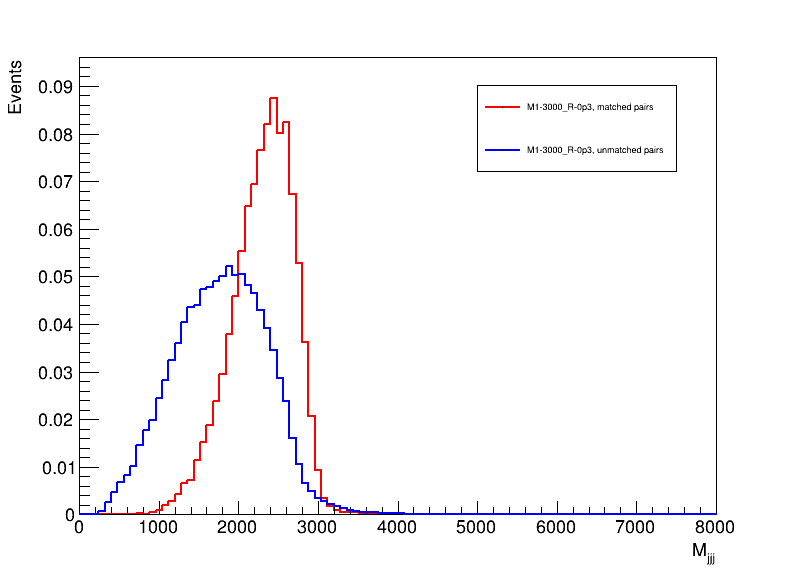

In [6]:
import math
ROOT.disableJSVis()
nvar = len(histo_dic.keys())
nrow = math.ceil(nvar/3)
color_dic = {"0":{"match":2, "unmatch":4},
            "1":{"match":6, "unmatch":8}}
plot_list = []
leg_list = []
for variable, hist_sel_sample_dic in histo_dic.items():
    y_upper = 0
    getRangeY(hist_sel_sample_dic)
    c = TCanvas(variable,"",800,600)
    leg = TLegend(0.6,0.7,0.85,0.85)
    title = variable2use[variable]["title"]
    isample = 0
    for sample, hist_sel_dic in hist_sel_sample_dic.items():
#         plot(h_plot=hist_sel_dic["all"], canvas=c, leg=leg, lcolor=11, lstyle=1, xtitle=title, dopt="HIST SAME", hlabel=f"{sample}, all pairs")
        plot(h_plot=hist_sel_dic["match"], canvas=c, leg=leg, lcolor=color_dic[str(isample)]["match"], lstyle=1, xtitle=title, dopt="HIST SAME", hlabel=f"{sample}, matched pairs")
        plot(h_plot=hist_sel_dic["unmatch"], canvas=c, leg=leg, lcolor=color_dic[str(isample)]["unmatch"], lstyle=1, xtitle=title, dopt="HIST SAME", hlabel=f"{sample}, unmatched pairs")
        isample += 1
    plot_list.append(c)
    leg_list.append(leg)
# display(plot_list)
# display(leg_list)
plot_name = [x for x in histo_dic.keys()]
for i in range(0,len(plot_list)):
    plot_list[i].cd()
    leg_list[i].Draw()
    plot_list[i].Draw()
    plot_list[i].Print(f"{plot_name[i]}.png")